<a href="https://colab.research.google.com/github/s29053/PAD/blob/main/zadanie7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# pip install statsmodels
# pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm

wyniki = pd.read_csv("wyniki.csv")
wyniki.head(5)

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [60]:
# Przeprowadź test T studenta na danych w pliku wyniki.csv

kobiety = wyniki.loc[wyniki['plec'] == "F"]
mezczyzni = wyniki.loc[wyniki['plec'] == "M"]

stats.ttest_ind(kobiety["ocena_koncowa"], mezczyzni["ocena_koncowa"])


Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.053113174845791505)

In [61]:
# Przyjmij significance level (alpha) na poziomie 0.05. Czy uda się odrzucić hipotezę zerową?

# Niestety pvalue jest większe od 0.05, więc nie udało się odrzucić hipotezy zerowej. Nie ma istotnej różnicy między wynikami uczniów i uczennic.

In [62]:
zyski = pd.read_csv("ZyskiFirmyX.csv")
zyski.head(5)

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


In [63]:
# Korzystając z danych w pliku ZyskiFirmyX.csv stwórz model regresji liniowej i biblioteki statmodels:

mod = sm.OLS(zyski.Zysk, zyski.Rok).fit()

In [64]:
import plotly.graph_objects as go

# Wyświetl wykres pokazujący zyski w czasie. 

zyski["fitted"] = mod.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=zyski["Rok"], y=zyski["Zysk"], name="Rok vs Zysk", mode="markers"))
fig.add_trace(go.Scatter(
    x=zyski["Rok"], y=zyski["fitted"], name="Fitted Regression Line"))
fig.update_layout(title="Linia regresji dla zysku na przestrzeni lat", xaxis_title="Rok",
    yaxis_title="Zysk")
fig.show()

In [65]:
# Czy da się zaobserwować trend? Jaki?

# Da się zaobserwować delikatny trend wzrostowy.

In [66]:
# Wyświetl podsumowanie modelu.

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Sun, 22 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        11:39:31   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rok            0.5315      0.018     29.498      0.000       0.496       0.567
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.542
Skew:                          -0.127   Prob(JB):                        0.762
Kurtosis:                       2.991   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
wydatki = pd.read_csv("spendingscores.csv")
wydatki.head(5)

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [68]:
# zwróć uwagę na zmienne będące kategoriami!

wydatki['Gender'].replace('Female', 0,inplace=True)
wydatki['Gender'].replace('Male', 1, inplace=True)
wydatki.head(5)

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [69]:
import statsmodels.formula.api as smf

#stwórz model regresji liniowej, gdzie zmienną zależną jest Spending score, a zmiennymi niezależnymi pozostałe zmienne.

mod1 = smf.ols(formula="SpendingScore ~ Gender + Age + AnnualIncome", data=wydatki).fit()

# Z modelu wyświetl:
# 	p values
# 	standard dev
# 	coefficients

mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        11:39:31   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       73.9300      6.642     11.130      0.000      60.831      87.029
Gender          -2.0132      3.512     -0.573      0.567      -8.939       4.913
Age             -0.6004      0.125     -4.806      0.000      -0.847      -0.354
AnnualIncome     0.0079      0.066      0.119      0.905      -0.123       0.139
==============================================================================
Omnibus:                       11.059   Durbin-Watson:                   3.448
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.033
Skew:                          -0.233   Prob(JB):                       0.0490
Kurtosis:                       2.288   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

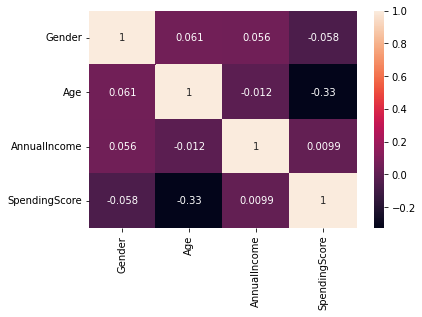

In [70]:
import seaborn as sn
import matplotlib.pyplot as plt

# Sprawdź czy istnieje korelacja pomiędzy zmiennymi. Pokaż to na wykresie, np. z biblioteki plotly express.

# Zmienne są generalnie dość słabo skorelowane ze sobą.

corr_matrix = wydatki.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [71]:
#Korzystając z eliminacji wstecznej usuń najmniej istotną zmienną i jeszcze raz wyświetl model.

# Największe p-value ma AnnualIncome, więc tą zmienną wyeliminujemy z modelu.

mod2 = smf.ols(formula="SpendingScore ~ Gender + Age", data=wydatki).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.22e-05
Time:                        11:39:31   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4089      5.281     14.089      0.000      63.994      84.824
Gender        -1.9892      3.497     -0.569      0.570      -8.886       4.908
Age           -0.6006      0.125     -4.821      0.000      -0.846      -0.355
==============================================================================
Omnibus:                       10.935   Durbin-Watson:                   3.447
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.938
Skew:                          -0.227   Prob(JB):                       0.0514
Kurtosis:                       2.289   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""